In [1]:
# Probability and math statistics
# Lesson 5. Home work https://gb.ru/study_groups/37123/homeworks/203089


In [3]:
# Tasks 1. The population is known to be normally distributed with a known standard deviation of 16. 
#          Find the width of the confidence interval for estimating the expectation `mu` with a reliability of 0.95 
#           if the sample mean is 80 and the sample size is 256

n = 256    # sample size
m = 80     # sample mean
sigma = 16 # standard deviation
rel = 0.95 # reliability

Ft = rel / 2  # 0.475
t = 1.96      # by a table for Laplas formula http://mathprofi.ru/files/u/laplas.png

# Confidence interval [left, right]
left = m - (t * sigma) / (n ** 0.5)
right = m + (t * sigma) / (n ** 0.5)

delta = right  - left # 3.9199999999999875
print (f'Interval = {round(delta,4)}') # 3.92


Interval = 3.92


t1 = -3.24983554401537, t2 = 3.2498355440153697, S = -1.0651074037450896
Left = 0.15728330176236427, Right =  0.8427166982376357, pvalue = 0.31456660352472854


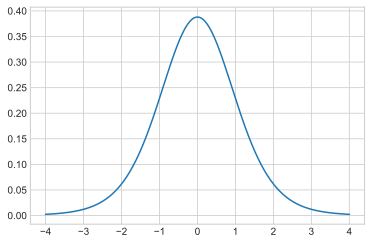

In [4]:
# Task2. The seller states that the average weight of a pack of biscuits is 200 g. 
#        A sample of 10 packs has been extracted from the lot. The weight of each pack is:
#          202, 203, 199, 197, 195, 201, 200, 204, 194, 190
#        It is known that their weights are normally distributed. 
#        Is the seller's statement true, given that the significance level is 1%? 
#        Find the P-value for this test and enter it as your answer 

import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

alpha = 0.01  # Significance level
weight = 200   # Seller hipothesis
weights = [202, 203, 199, 197, 195, 201, 200, 204, 194, 190]

def statistic(samples: np.ndarray) -> float:
    return (samples.mean() - weight) / (samples.std(ddof=1) / np.sqrt(samples.shape[0]))

_samples = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])
n = _samples.shape[0]

# Corrected sample variance
std = _samples.std(ddof=1)

# Student distribution t
t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)

t1 = stats.t.ppf(alpha / 2, df=n-1)     # -3.24983554401537
t2 = stats.t.ppf(1 - alpha / 2, df=n-1) # 3.24983554401537
S = statistic(_samples) # -1.0651074037450896 and OUT OF CRITICAL AREA

print(f't1 = {t1}, t2 = {t2}, S = {S}')

# Draw the plot
plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

ox = np.linspace(-4, 4, 500)
oy = stats.t.pdf(ox, df=n - 1)

ox_left = np.linspace(-4, t1, 100)
oy_left = stats.t.ppf(ox_left, df=n - 1)

ox_right = np.linspace(t2, 4, 100)
oy_right = stats.t.ppf(ox_right, df=n - 1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

# Critical area calculation
p_left = stats.t.cdf(S, df=n - 1)
p_right = 1 - stats.t.cdf(S, df=n - 1)

# P-value
pvalue = 2 * min(p_left, p_right)

print(f'Left = {p_left}, Right =  {p_right}, pvalue = {pvalue}')  # To be: 0.314566


In [2]:
# Task3. Given a selection of bearing diameters from example 1 from lesson 5
#        Assuming that the bearing diameters are normally distributed, test the hypothesis 
#        that the variance of the random variable is `0.0625` at a significance level of `alpha = 0.05`. 
#        What you need to know for this:
#          1. The alternative hypothesis is two-sided.
#          2. Statistics for the test: `H = (n - 1) * sample_variance / variance`, where `n` is the number of items in the sample, `sample_variance` is the unbiased estimate of the variance, `variance` is the variance asserted by the null hypothesis.
#          3. This statistic, assuming the null hypothesis is true, has a chi-square distribution with parameter `df = n - 1`. Its quantiles can be found using the `scipy.stats.chi2.ppf` function
#        For your answer, write 1 if the null hypothesis is true, and 0 otherwise.

import numpy as np
from scipy import stats

l = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134, 
     1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372, 
     0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02]

D = 0.0625  # Dispersion
alpha = 0.05

items = np.array(l)
n = items.shape[0]

def stat(samples: np.ndarray) -> float:
    return (n - 1) * (samples.var(ddof=1)) / D

S = stat(items)

# Student distribution t
t1 = stats.chi2.ppf(alpha/2, df=n-1)
t2 = stats.chi2.ppf(1 - alpha/2, df=n-1)

print(f't1 = {t1}, t2 = {t2}, S = {S}')

# Critical area calculation
p_left = stats.chi2.cdf(S, df=n-1)
p_right = 1 - stats.chi2.cdf(S, df=n-1)

pvalue = 2 * min(p_left, p_right)

print(f'Left = {p_left}, Right =  {p_right}, pvalue = {pvalue}')  # To be: 0.37950875392024197

t1 = 11.688551922452438, t2 = 38.0756272503558, S = 28.720541753333343
Left = 0.810245623039879, Right =  0.18975437696012099, pvalue = 0.37950875392024197
